In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras import layers

In [2]:
# syscov = np.loadtxt('data/pantheon_errors.txt',skiprows=1).reshape((1048,1048))
syscov = np.loadtxt('data/jla_v0_covmatrix.dat',skiprows=1).reshape((740,740))
print(np.min(syscov), np.max(syscov), np.mean(syscov))


-0.0166258178256 0.0347767817719 0.0025805871334024376


In [3]:
count = 0

for i in range(len(syscov)):
    for j in range(len(syscov)):
        if np.iscomplex(syscov[i,j]):
            print("COMPLEX")
        if syscov[i,j] != syscov[j,i]:
            print(i,j)
            print(syscov[i,j], syscov[j,i]) 
            count+=1
            syscov[j,i] = syscov[i, j]

count

0 10
9.33387814202e-05 9.33387814201e-05
0 75
9.05443602016e-05 9.05443602015e-05
2 68
5.84269431267e-05 5.84269431266e-05
3 107
0.000136763299594 0.000136763299593
3 175
6.821596824e-05 6.82159682399e-05
4 19
0.000218987354692 0.000218987354691
7 224
6.57226796625e-05 6.57226796624e-05
8 13
9.57880153294e-05 9.57880153295e-05
8 26
0.00661609551033 0.00661609551034
8 96
0.000253469634018 0.000253469634019
8 154
9.9063520192e-05 9.90635201921e-05
8 227
-3.79691626194e-06 -3.79691626193e-06
8 231
0.000255139378748 0.000255139378749
9 157
6.23071374699e-05 6.23071374698e-05
10 116
5.51821214604e-05 5.51821214603e-05
12 198
6.16747798165e-05 6.16747798164e-05
13 18
7.67427279413e-05 7.67427279412e-05
13 121
9.04513387774e-05 9.04513387773e-05
13 218
6.97373549281e-05 6.9737354928e-05
14 68
3.2722108844e-06 3.27221088441e-06
14 81
9.91102935493e-06 9.91102935494e-06
14 85
-1.71950071068e-07 -1.71950071066e-07
15 92
0.000216399317748 0.000216399317747
17 172
1.76995240946e-07 1.76995240947e-

181

In [4]:
# file = 'data/pantheon.txt'
file = 'data/jla_lcparams.txt'

data = pd.read_csv(file, sep = " " ,usecols=['zcmb', 'mb', 'dmb'] )
# X = data.values[:,0]
staterr = data.values[:,2]

In [5]:
covfull = np.copy(syscov)
covfull[np.diag_indices_from(covfull)] += staterr**2
print(np.shape(syscov), np.shape(covfull))
mincov = np.min(covfull)
maxcov = np.max(covfull)
meancov = np.mean(covfull)
print(mincov, maxcov, meancov)

(740, 740) (740, 740)
-0.0166258178256 0.0633448802129 0.0025992186787941202


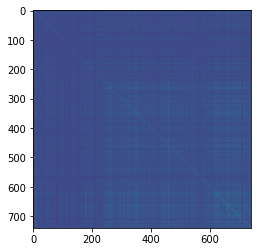

In [6]:
# df_syscov = pd.DataFrame(syscov)
# sns.heatmap(df_syscov, annot=False, fmt='g', xticklabels=False, yticklabels=False, cmap = 'inferno',
#             robust=True)

# plt.savefig("cov_sys.png", dpi=300)
plt.imshow(covfull)

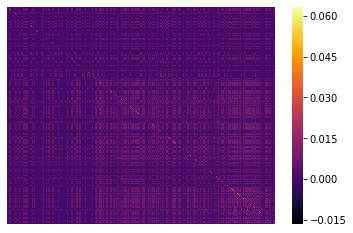

In [7]:
df_covfull = pd.DataFrame(covfull)
sns.heatmap(df_covfull, annot=False, fmt='g', xticklabels=False, yticklabels=False, 
            cmap = 'inferno',
            vmax=maxcov, vmin=mincov,robust=True)

In [8]:
np.min(syscov.diagonal()) #checking non-negatives

0.000101239339154

In [9]:
syscov[0,1] == syscov[1,0]

True

In [10]:
np.min(syscov)

-0.0166258178256

In [11]:
# eigenval, eigenvec = sp.linalg.eigh(syscov)
eigenval, eigenvec = sp.linalg.eigh(covfull)

In [12]:
np.shape(eigenval), np.shape(eigenvec)

((740,), (740, 740))

The eigenvalues are positive?

In [13]:
np.min(eigenval)

0.007294097912483412

In [14]:
count = 0

for i in range(len(eigenvec)):
    for j in range(len(eigenvec)):
        if np.iscomplex(eigenvec[i,j]):
#             print("COMPLEX")
            count+=1
#             print(i,j)
#             print(eigenvec[i,j])

print(count)

0


In [15]:
def gram_schmidt_columns(X):
    Q, R = np.linalg.qr(X)
    return Q

In [16]:
ortM = np.array(gram_schmidt_columns(np.real(eigenvec)))

(740, 740)


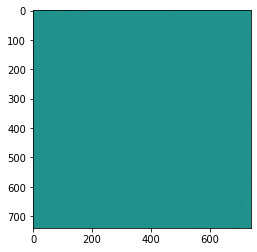

In [17]:
print(np.shape(ortM))
plt.imshow(ortM)

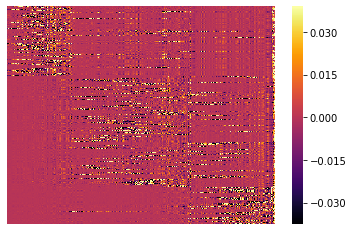

In [18]:
sns.heatmap(pd.DataFrame(ortM), annot=False, fmt='g', xticklabels=False, yticklabels=False, 
            cmap = 'inferno', 
            robust=True)

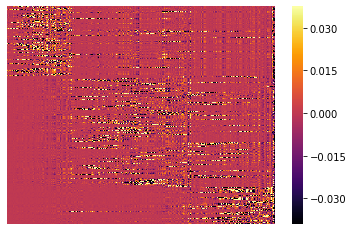

In [19]:
df_eig = pd.DataFrame(eigenvec)
sns.heatmap(df_eig, annot=False, fmt='g', xticklabels=False, yticklabels=False, 
            cmap = 'inferno', 
            robust=True)

### Generate eigenvectors matrix with noise

In [20]:
numMatrix = 100
noise_factor = 1e-5
# scaler = MinMaxScaler(feature_range=(-1,1))
# scaler.fit(ortM)
eigenvecdata = np.zeros((numMatrix, 740, 740))
for i in range(numMatrix): 
    eigenvecdata[i] = ortM + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=ortM.shape) 
#     eigenvecdata[i] = scaler.transform(eigenvecdata[i])


(100, 740, 740)
(20, 740, 740) (80, 740, 740)


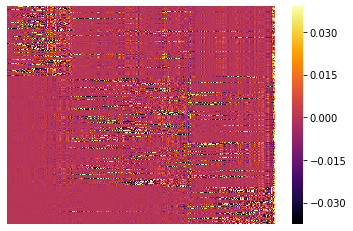

In [21]:
print(np.shape(eigenvecdata))
split = 0.8
ntrain = int(split * numMatrix)
indx = [ntrain]
evec_train, evec_test = np.split(eigenvecdata, indx, axis=0)
print(np.shape(evec_test), np.shape(evec_train))
sns.heatmap(pd.DataFrame(evec_test[0, :, :]), 
            fmt='g', xticklabels=False, yticklabels=False, 
            cmap = 'inferno', 
            robust=True)

In [39]:
# input_cov = Input(shape=(1048,))

input_cov = Input(shape=(740, 740, 1))

x = layers.Conv2D(2, (3, 3), activation='relu', padding='same')(input_cov)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(2, (3, 3), activation='relu', padding='same')(x)

encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(2, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(2, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='linear', padding='same')(x)

autoencoder = tf.keras.Model(input_cov, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder_train = autoencoder.fit(evec_train, evec_train,
                epochs=20,
                batch_size=16,
#                 shuffle=True,
                validation_data=(evec_test, evec_test))
#                 callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/20


In [ ]:
autoencoder.summary()

In [ ]:
plt.plot(autoencoder_train.history['loss'], color='r', )
plt.plot(autoencoder_train.history['val_loss'], color='g')
# plt.title('model loss function')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')

In [26]:
print(np.shape(evec_test))
decoded_imgs = autoencoder.predict(evec_test)
decoded_imgs[0, :, :, 0]

(20, 740, 740)


array([[-0.00784753, -0.00798828, -0.00807007, ..., -0.00715406,
        -0.00702166, -0.00874858],
       [-0.00849016, -0.01072433, -0.01076728, ..., -0.00968761,
        -0.00987793, -0.01292571],
       [-0.0072252 , -0.00883604, -0.00886006, ..., -0.00752718,
        -0.00787652, -0.01210128],
       ...,
       [-0.0097626 , -0.01015602, -0.00998966, ..., -0.01249927,
        -0.01312118, -0.01033939],
       [-0.00955424, -0.0099299 , -0.00969593, ..., -0.01162722,
        -0.01222786, -0.00965432],
       [-0.00639548, -0.00664074, -0.00656017, ..., -0.00649122,
        -0.00701703, -0.00752538]], dtype=float32)

(20, 740, 740, 1)
(20, 740, 740, 1)


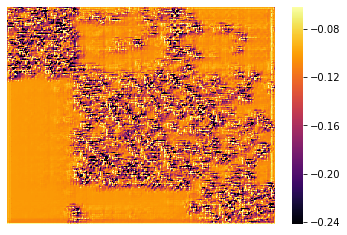

In [38]:
print(np.shape(decoded_imgs))
# plt.imshow(decoded_imgs[3, : , :, 0])
print(np.shape(decoded_imgs))
sns.heatmap(pd.DataFrame(decoded_imgs[0, :, :, 0]*10), 
            fmt='g', xticklabels=False, yticklabels=False, 
            cmap = 'inferno', 
            robust=True)

In [28]:
print(np.shape(decoded_imgs))
# sns.heatmap(pd.DataFrame(scaler.inverse_transform(decoded_imgs[0, :, :, 0])), 
#             fmt='g', xticklabels=False, yticklabels=False, 
#             cmap = 'inferno', 
#             robust=True)

(20, 740, 740, 1)


(20, 740, 740)


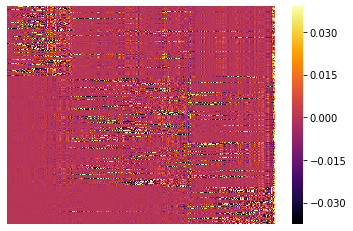

In [37]:
print(np.shape(evec_test))
# plt.imshow(evec_test[3, : , :])
sns.heatmap(pd.DataFrame(evec_test[0, :, :]),
            fmt='g', xticklabels=False, yticklabels=False, 
            cmap = 'inferno', 
            robust=True)

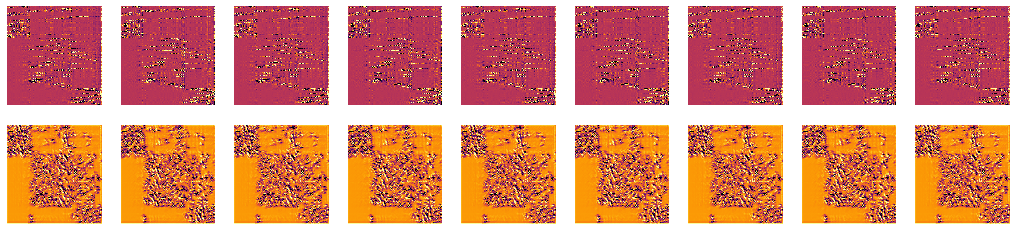

In [36]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # Display original
    ax = plt.subplot(2, n, i)
#     plt.imshow(evec_test[i, :, :]*20)
    sns.heatmap(pd.DataFrame(evec_test[i, :, :]), 
                xticklabels=False, yticklabels=False, 
                cmap = 'inferno', 
                robust=True, cbar=False)
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
     # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    sns.heatmap(pd.DataFrame(decoded_imgs[i, :, :, 0]),
                xticklabels=False, yticklabels=False, 
                cmap = 'inferno', 
                robust=True, cbar=False)
#     plt.imshow(decoded_imgs[i, :, :, 0])
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

plt.show()